### analysis of the twitter dataset

In [1]:
import pickle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import ttest_ind    # ttest_ind tests the equality of means
from scipy.stats import chisquare    # chisquare tests the independence of 2 distributions

In [4]:
dftw = pickle.load(open("/home/xhta/Robot/proj/tw/pj_dftw_full.20190630_005652.pkl", "rb"))

In [5]:
spa = dftw["npast"].sum()
spr = dftw["npresent"].sum()
sfu = dftw["nfuture"].sum()
sAvepast = spa /(spa + spr + sfu)
sAvepresent = spr / (spa + spr + sfu)
sAvezfuture = sfu / (spa + spr + sfu)

lpa = dftw["nfpast"].sum()
lpr = dftw["nfpresent"].sum()
lfu = dftw["nffuture"].sum()
lAvepast = lpa/ (lpa + lpr + lfu)
lAvepresent = lpr/ (lpa + lpr + lfu)
lAvezfuture = lfu/ (lpa + lpr + lfu)

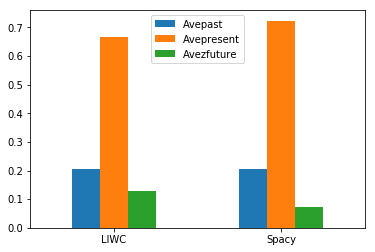

In [6]:
modfplot = pd.DataFrame({'Avepast' : [lAvepast, sAvepast], 'Avepresent': [lAvepresent, sAvepresent], 'Avezfuture': [lAvezfuture, sAvezfuture]}, index =
 ['LIWC', 'Spacy'] )
modfplot.plot.bar(rot=0)
plt.show()

In [8]:
dftw.head()

,leng,nwords,ntoks,nverbs,npast,npresent,nfuture,nfpast,nfpresent,nffuture,tw,nsents,antpast,antpresent,antfuture,antfpast,antfpresent,antffuture,ldeont,lmodal
0,99.0,20.0,3.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,: Indirect cost of the UK being in the EU is e...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VIDEO: Sturgeon on post-election deals,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,104.0,18.0,3.0,4.0,2.0,0.0,0.0,2.0,2.0,0.0,: The economy was growing times faster on the ...,1.0,1.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0
3,71.0,13.0,3.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,: the UKIP east lothian candidate looks about ...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,75.0,13.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,: UKIP's housing spokesman rakes in £800k in h...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
dftw['nfuture'].describe()

count    20000.000000
mean         0.138700
std          0.379038
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: nfuture, dtype: float64

In [10]:
dftw['nfuture'].sum()

2774.0

In [11]:
print(sAvepast, sAvepresent, sAvezfuture, lAvepast, lAvepresent, lAvezfuture)

0.20521856295183064 0.7229031171455963 0.07187831990257301 0.20512503401024018 0.6655618491676767 0.12931311682208316


In [12]:
# POS tagging, reuters, past tense, present tense, future tense
chisquare([21, 72, 7], [33, 33, 34])
# large t statistics and small p value indicate the observed distribution is not uniform

Power_divergenceResult(statistic=71.89572192513369, pvalue=2.443668821406244e-16)

In [13]:
# LIWC, reuters, past focus, present focus, future focus
chisquare([20, 67, 13], [33, 33, 34])
# large t statistics and small p value indicate the observed distribution is not uniform

Power_divergenceResult(statistic=53.12210338680927, pvalue=2.9152903563929526e-12)

In [14]:
ttest_ind(dftw['antpast'], dftw['antpresent'], equal_var = False, nan_policy='omit')
# deliberate use of past, present tenses

Ttest_indResult(statistic=-100.5204464921747, pvalue=0.0)

In [15]:
ttest_ind(dftw['antpresent'], dftw['antfuture'], equal_var = False, nan_policy='omit')
# deliberate use of present, future tenses

Ttest_indResult(statistic=150.55508675466808, pvalue=0.0)

In [16]:
# POS vs LIWC   past  twitter
ttest_ind(dftw['antpast'], dftw['antfpast'], equal_var = False, nan_policy='omit')
# results indicate unequal means 

Ttest_indResult(statistic=6.200128869348279, pvalue=5.697474547210707e-10)

In [17]:
# POS vs LIWC   present  twitter
ttest_ind(dftw['antpresent'], dftw['antfpresent'], equal_var = False, nan_policy='omit')
# results indicate unequal means 

Ttest_indResult(statistic=8.52907112130451, pvalue=1.526292041817904e-17)

In [18]:
# POS vs LIWC   future  twitter
ttest_ind(dftw['antfuture'], dftw['antffuture'], equal_var = False, nan_policy='omit')
# results indicate unequal means 

Ttest_indResult(statistic=-12.500282152510792, pvalue=8.684730276286873e-36)

In [7]:
from textblob import TextBlob

In [10]:
analy = TextBlob(dftw.loc[1, 'tw'])

In [15]:
analy.sentiment.polarity

0.0

In [17]:
dftw.loc[1, 'tw']

'VIDEO: Sturgeon on post-election deals'

In [23]:
TextBlob(dftw.loc[1331, 'tw']).sentiment.polarity

0.0

In [26]:
for inde in dftw.index:
    dftw.at[inde, 'pol'] = TextBlob(dftw.at[inde, 'tw']).sentiment.polarity

In [27]:
dftw.pol.describe()

count    20000.000000
mean         0.051826
std          0.268120
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.125000
max          1.000000
Name: pol, dtype: float64

In [28]:
dftw.pol.sum()

1036.5249976331359

In [29]:
dftw.head(11)

,leng,nwords,ntoks,nverbs,npast,npresent,nfuture,nfpast,nfpresent,nffuture,...,nsents,antpast,antpresent,antfuture,antfpast,antfpresent,antffuture,ldeont,lmodal,pol
0,99.0,20.0,3.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000
1,38.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
2,104.0,18.0,3.0,4.0,2.0,0.0,0.0,2.0,2.0,0.0,...,1.0,1.0,0.0,0.0,0.500000,0.500000,0.000000,0.0,0.0,0.000000
3,71.0,13.0,3.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,...,1.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000
4,75.0,13.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.000000
5,49.0,11.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.625000
6,81.0,13.0,2.0,3.0,0.0,3.0,0.0,0.0,2.0,0.0,...,3.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000
7,118.0,23.0,4.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,...,2.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000
8,112.0,22.0,3.0,7.0,0.0,1.0,0.0,1.0,1.0,1.0,...,3.0,0.0,1.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,-0.100000
9,111.0,22.0,1.0,4.0,0.0,3.0,0.0,1.0,0.0,0.0,...,3.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.123611


In [30]:
import statsmodels.api as sm

In [32]:
X = dftw[['leng', 'npast', 'npresent']]
y = dftw['pol']

In [33]:
X = sm.add_constant(X)

/home/xhta/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [34]:
X.head()

,const,leng,npast,npresent
0,1.0,99.0,0.0,0.0
1,1.0,38.0,0.0,0.0
2,1.0,104.0,2.0,0.0
3,1.0,71.0,0.0,2.0
4,1.0,75.0,0.0,2.0


In [35]:
sm_model = sm.OLS(y, X).fit()

In [36]:
pred = sm_model.predict(X)

In [37]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pol   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     15.59
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           4.00e-10
Time:                        16:01:00   Log-Likelihood:                -2028.5
No. Observations:               20000   AIC:                             4065.
Df Residuals:                   19996   BIC:                             4097.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0759      0.006     12.744      0.000       0.064       0.088
leng          -0.0002   6.84e-05     -2.727      0.006      -0.000   -5.25e-05
npast          0.0068      0.003      2.280      0.023       0.001       0.013
npresent      -0.0069      0.002     -4.226      0.000      -0.010      -0.004
==============================================================================
Omnibus:                     1589.950   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9256.171
Skew:                           0.100   Prob(JB):                         0.00
Kurtosis:                       6.327   Cond. No.                         305.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""